# b06705048_hw1

## Load package and data
Load packages and data, and then standardize all feature values.
Now, we have data：

* X_train: original x in trainning set 

* Y_train: y in trainning set

* X_test: original x in testing set

* Y_test: y in testing set

* X_Train: x in trainning set (with standardization)

* X_Test: x in testing set(with standardization)


In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import pickle
import math
import matplotlib.pyplot as plt

In [0]:
file = open("msd_data1.pickle","rb")
msd = pickle.load(file)
file.close()

X_train = np.array(msd['X_train'])
Y_train = np.array(msd['Y_train'])
X_test = np.array(msd['X_test'])
Y_test = np.array(msd['Y_test'])

X_data = np.append(X_train, X_test,axis=0)
X_Data = (X_data - np.mean(X_data, axis=0)) /np.std(X_data, axis=0) 

X_Train = X_Data[:5000]
X_Test = X_Data[5000:]

# print(X_train.ndim, X_train.shape, X_train.dtype)
# print(Y_train.ndim, Y_train.shape, Y_train.dtype)

## Q1 [myknn_regressor]

### Q1.1

create a knn model which is able to do predictions given training data and hyper-parameter k.

* functions in __class myknn_regressor__：

1. __init__: input k and the function way: equal_weight or remove_outliers

2. __fit__: input training data X and training data Y

3. __predict__：compute the prediction

4. __fetch_k_neighbors__：find the  K-nearest-neighbors and return their index

* define useful global function：

1. __removeOutliers__： 
input an list and remove the outliers that outside of [Q1 - 1.5 * IOR, Q3 + 1.5 * IOR]. used when the user choose "remove_outliers" as function way and k >=10

2. __RMSE__：
return RMSE between true values and prediction


In [0]:
def removeOutliers(x):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = upper_quartile - lower_quartile
    quartileSet = (lower_quartile - 1.5 * IQR, upper_quartile + 1.5 * IQR)
    resultList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
        #else:
         # print("remove")
    return resultList

def RMSE(Y_test, ypred):
    error = []
    squaredError = []
    absError = []
    for i in range(Y_test.shape[0]):
      error.append(Y_test[i] - ypred[i])
    for val in error:
        squaredError.append(val * val)
    return (math.sqrt(sum(squaredError) / len(squaredError)))

In [0]:
# Q1.1
class myknn_regressor:
    def __init__(self, k, option):
        self.k = k
        self.option = option

    def fit(self, X_train, Y_train):  #traing the model
        self.X_train = X_train 
        self.Y_train = Y_train
        

    def predict(self, X_test)-> np.ndarray: #compute the prediction
        self.X_test = X_test
        prediction = np.zeros([self.X_test.shape[0], ])
 
        for i in range(self.X_test.shape[0]): 
          neighbors = self.fetch_k_neighbors(self.X_test[i])   
          predict_y = []
          for j in range(len(neighbors)):
            predict_y.append(Y_train[neighbors[j]])
          if(self.option == "remove_outliers" and self.k > 10):
            predict_y = removeOutliers(predict_y)
            prediction[i] = (sum(predict_y)/len(predict_y))
          else:
            prediction[i] = (sum(predict_y)/self.k)
        return prediction

    def fetch_k_neighbors(self, X_test):
        distances = []
        neighbors = []
        for i in range(len(self.X_train)): 
          # Euclidian distance
          #dis = np.sqrt(np.sum((np.array(x) - self.X_train[i])**2))
          dis = np.sqrt(np.sum(np.power(X_test - self.X_train[i], 2)))
          distances.append((i,dis))
        distances.sort(key = lambda d: (d[1], d[0]))
        for i in range(self.k):
          neighbors.append(distances[i][0])
        return neighbors

## Q1.2
* input：

1. k = 20

2. option： "equal_weight"

3. standardized data：X_Train and X_Test

to show first 20 predictions in the testing data and RMSE

In [94]:
#Q1.2
myknn = myknn_regressor(20, "equal_weight")
myknn.fit(X_Train, Y_train)
ypred = myknn.predict(X_Test)
print("RMSE =", RMSE(Y_test, ypred))
print(ypred[:20])

RMSE = 10.259587873464188
[1993.35 1994.   2000.65 1991.5  1992.8  1998.5  1988.1  1991.65 2002.25
 2003.   1999.75 1998.65 1995.55 1997.2  1995.05 1997.4  1992.   2000.45
 2003.2  1995.75]


* output：

1. RMSE = 10.259587873464188

2. first 20 predictions：[1993.35, 1994.0,   2000.65, 1991.5, 1992.8, 1998.5, 1988.1,  1991.65, 2002.25,
 2003.0,   1999.75, 1998.65, 1995.55, 1997.2,  1995.05, 1997.4,  1992.0,   2000.45, 2003.2,  1995.75]


## Q1.3
* input：

1. k = 20

2. option： "remove_outlierst"

3. standardized data：X_Train and X_Test

to show first 20 predictions in the testing data and RMSE

In [95]:
# Q1.3
myknn = myknn_regressor(20, "remove_outliers")
myknn.fit(X_Train, Y_train)
ypred2 = myknn.predict(X_Test)
print("RMSE =", RMSE(Y_test, ypred2))
print(ypred2[:20])

RMSE = 10.206852722356276
[1993.35       1994.         2000.65       1992.73684211 1992.8
 2000.         1988.1        1991.65       2002.25       2003.94736842
 1999.75       2000.94444444 1995.55       1997.2        1998.61111111
 1997.4        1992.         2003.83333333 2003.2        1995.75      ]


* output：
1. RMSE = 10.206852722356276

2. first 20 predictions：[1993.35       1994.         2000.65       1992.73684211 1992.8
 2000.0         1988.1        1991.65       2002.25       2003.94736842
 1999.75       2000.94444444 1995.55       1997.2        1998.61111111
 1997.4        1992.         2003.83333333 2003.2        1995.75      ]

Compare Q1.2 and Q1.3, when k = 20, the RMSE of removing outliers before computing the mean is lower than equal weight, which means that it has better performance

## Q2 [Tuning the Hyper-parameter]

load package sklearn and set k 

In [0]:
from sklearn.neighbors import KNeighborsRegressor
K = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]

### Case1: standardized klearn
* input:

1. standardized data：X_Train and X_Test

2. Use the knn regressor from klearn.neighbors.KNeighborsRegressor

* output:
print RMSE with different k

In [38]:
# 2-1 feature scaling
## plot a curve(k-RMSE)
RMSE1 =[]
for k in K:
  neigh = KNeighborsRegressor(n_neighbors = k)
  neigh.fit(X_Train, Y_train) 
  get = RMSE(Y_test, neigh.predict(X_Test))
  RMSE1.append(get)
  print("k = ",k,"RMSE: ", get)

k =  1 RMSE:  13.96895367114755
k =  2 RMSE:  12.092787106370475
k =  3 RMSE:  11.376243928728188
k =  4 RMSE:  11.038971683691074
k =  5 RMSE:  10.870996274491139
k =  10 RMSE:  10.417184360469005
k =  15 RMSE:  10.322535792390612
k =  20 RMSE:  10.259587873464188
k =  25 RMSE:  10.237273230699653
k =  30 RMSE:  10.225737282121178
k =  35 RMSE:  10.194419815475012
k =  40 RMSE:  10.194883857847513
k =  45 RMSE:  10.199987105615993
k =  50 RMSE:  10.205220174008993
k =  55 RMSE:  10.208596366769253
k =  60 RMSE:  10.219969862063271
k =  80 RMSE:  10.227230909847176
k =  100 RMSE:  10.247051366124797
k =  120 RMSE:  10.259975237543223
k =  140 RMSE:  10.281837520069818
k =  160 RMSE:  10.309192252977647
k =  180 RMSE:  10.32765350422313
k =  200 RMSE:  10.349121530352232


### Case2: klearn
* input:

1. non-standardized data：X_train and X_test

2. Use the knn regressor from klearn.neighbors.KNeighborsRegressor

* output:
print RMSE with different k

In [36]:
# 2-2 non-feature scaling
RMSE2 = []
for k in K:
  neigh = KNeighborsRegressor(n_neighbors = k)
  neigh.fit(X_train, Y_train) 
  get = RMSE(Y_test, neigh.predict(X_test))
  RMSE2.append(get)
  print("k = ",k,"RMSE: ", get)

k =  1 RMSE:  14.923638966418345
k =  2 RMSE:  12.777499755429464
k =  3 RMSE:  12.075674967716077
k =  4 RMSE:  11.767805657810635
k =  5 RMSE:  11.466392632384453
k =  10 RMSE:  11.077460900404935
k =  15 RMSE:  10.88897913794797
k =  20 RMSE:  10.797788546734951
k =  25 RMSE:  10.790073017979692
k =  30 RMSE:  10.750265612567011
k =  35 RMSE:  10.717738719772298
k =  40 RMSE:  10.714437504678774
k =  45 RMSE:  10.698494013475859
k =  50 RMSE:  10.69110105960404
k =  55 RMSE:  10.68260873412441
k =  60 RMSE:  10.672535729098705
k =  80 RMSE:  10.662907517124506
k =  100 RMSE:  10.677019504524656
k =  120 RMSE:  10.68313963899639
k =  140 RMSE:  10.687017556442067
k =  160 RMSE:  10.691630026202139
k =  180 RMSE:  10.69071978380711
k =  200 RMSE:  10.69885337470018


### Case3:myknn
* input:

1. standardized data：X_Train and X_Test

2. Use myknn_regressor with "remove_outlier" 

* output:
print RMSE with different k

(also show the computing time since it's too slow)

In [97]:
# 2-3 myknn = myknn_regressor(20, "remove_outier")
%%time
RMSE3 = []

for k in K:
  myknn = myknn_regressor(k, "remove_outliers")
  myknn.fit(X_Train, Y_train)
  get = RMSE(Y_test, myknn.predict(X_Test))
  RMSE3.append(get)
  print("k =", k,",RMSE =", get)

k = 1 ,RMSE = 13.96895367114755
k = 2 ,RMSE = 12.092787106370475
k = 3 ,RMSE = 11.376243928728188
k = 4 ,RMSE = 11.038971683691074
k = 5 ,RMSE = 10.870996274491139
k = 10 ,RMSE = 10.417184360469005
k = 15 ,RMSE = 10.301046302948413
k = 20 ,RMSE = 10.206852722356276
k = 25 ,RMSE = 10.202399000051475
k = 30 ,RMSE = 10.147823416853129
k = 35 ,RMSE = 10.119056863101003
k = 40 ,RMSE = 10.085629015635247
k = 45 ,RMSE = 10.06258742893074
k = 50 ,RMSE = 10.07258994242119
k = 55 ,RMSE = 10.063029247859852
k = 60 ,RMSE = 10.07007349375236
k = 80 ,RMSE = 10.056971067116004
k = 100 ,RMSE = 10.061107003069457
k = 120 ,RMSE = 10.06536782690124
k = 140 ,RMSE = 10.08929130026124
k = 160 ,RMSE = 10.109615407419875
k = 180 ,RMSE = 10.11467417351494
k = 200 ,RMSE = 10.14736014185608
CPU times: user 58min 45s, sys: 417 ms, total: 58min 46s
Wall time: 58min 48s


### plot curves between three cases 

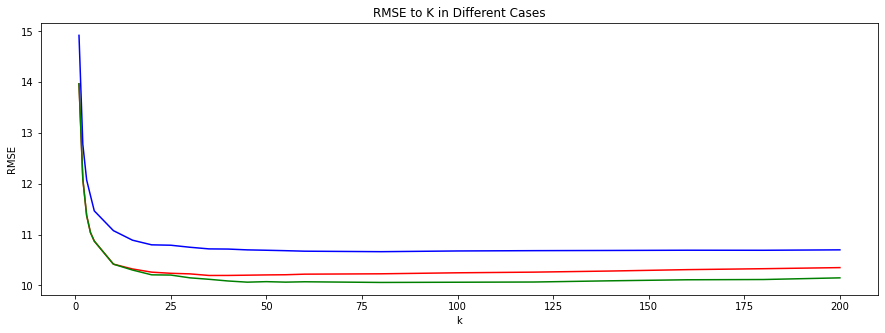

In [107]:
plt.figure(figsize=(15,5))

plt.title("RMSE to K in Different Cases")
plt.xlabel("k")
plt.ylabel("RMSE")

plt.plot(K, RMSE1, 'r', label = "Case1")
plt.plot(K, RMSE2, 'b', label = "Case2")
plt.plot(K, RMSE3, 'g', label = "Case3")


## Observations

1. in case1：
  When we use klearn.neighbors.KNeighborsRegressor with standardized data, the best k locates at the interval of 25 to 50.

2. in case2：
  When we use klearn.neighbors.KNeighborsRegressor with non-standardized data, the best k may be around 80 wih RMSE = 10.662907517124506.

3. in case3：
  Among selected multiple k, for my knn regressor show the lowest RMSE when k = 80

4. in case1 and case2：

  using standardized data and unstandardized data in klearn.neighbors.KNeighborsRegressor, the former one with standardized data show the better performance than the later one.

5. Among the three cases:

  Myknn regressor with removing outliers show the best preformance in prediction when k larger than about 25.(it wouldn't remove outlier when k < 10)